![](http://thecads.org/wp-content/uploads/2017/02/adax_logo.jpg)
# Module 7: Unsupervised Machine Learning

The second family of machine learning algorithms that we will be covering is unsupervised learning algorithms. Unsupervised learning includes all kinds of machine learning where there is no known output or target, simply because there is no "teacher" to instruct the learning algorithm to achieve any targets. In unsupervised learning, the learning algorithm is just shown the input data and asked to extract knowledge from this data. In other words, unsupervised machine learning involves finding **patterns** from the data that could be useful for a range of tasks. 

## Types of Unsupervised Learning

We will look into two kinds of unsupervised learning: *data transformations* and *clustering*.

#### Finding unsupervise transformations

*Unsupervised transformations* of a dataset are algorithms that create a new representation of the data which might be easier for humans or other machine learning algorithms to understand compared to the original representation of the data. A common
application of unsupervised transformations is dimensionality reduction, which takes a high-dimensional representation of the data, consisting of many features, and finds a new way to represent this data that summarizes the essential characteristics with fewer features. A common application for dimensionality reduction is reduction to two dimensions for visualization purposes.
Another application for unsupervised transformations is finding the parts or components that "make up" the data. An example of this is topic extraction on collections of text documents. Here, the task is to find the unknown topics that are talked about in
each document, and to learn what topics appear in each document. This can be useful for tracking the discussion of certain themes and interests.

*Clustering* algorithms partition data into distinct groups of similar items. Consider the example of uploading photos to a social media site. To allow you to organize your pictures, the site might want to group together pictures that show the same person. However, the site doesn’t know which pictures show whom, and it does not know how many different people appear in your photo collection. A sensible approach would be to extract all the faces and divide them into groups of faces that look similar. Hopefully, these correspond to the same person, and the images can be grouped together for you.

#### Challenges in Unsupervised Learning

A major challenge in unsupervised learning is evaluating whether the algorithm learned something useful. Unsupervised learning algorithms are usually applied to data that does not contain any label information, so we do not know what the right output should be. Therefore, it is very hard to say whether a model "did well". Often, the only way to evaluate the result of an unsupervised algorithm is to inspect it manually.

So, how can unsupervised algorithms be used for?

1. For **data exploration**, when a data scientist wants to understand the data better, rather than as part of a larger automatic system.
2. As a **preprocessing step for supervised algorithms**. Learning a new representation of the data can sometimes improve the accuracy of supervised algorithms, or can lead to reduced memory and time consumption.

Before we start with "real" unsupervised algorithms, we will briefly revisit some simple preprocessing methods that often come in handy. Even though preprocessing and scaling are often used in tandem with supervised learning algorithms, scaling methods are generally unsupervised in nature; they don't rely on label information.

### Pre-processing and Scaling

In [1]:
#Todo: Import all general modules, make_blobs, StandardScaler, MinMaxScaler, Normalizer, RobustScaler
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline
#Todo: compare and explain each scalers and check how they differ

Let's take a look at a simple example of data that may be skewed towards a particular narrow range of values:

Text(0,0.5,'Feature 2')

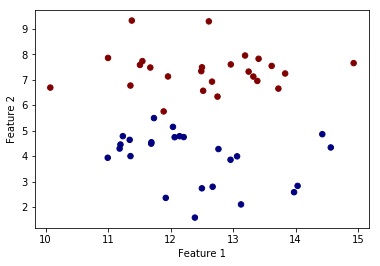

In [2]:
#Todo: As before, make_blobs with 50 samples, 2 clusters, set a random state, and cluster standard dev of 1
# Assign the blobs to X,y below
X, y = make_blobs(n_samples=50,random_state=4,cluster_std=1,centers=2)

#Todo: shift the scatters by 3 points to have better visuals
X +=3
# Todo: Plot data
plt.scatter(X[:,0],X[:,1], c=y, cmap='jet',s=30)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

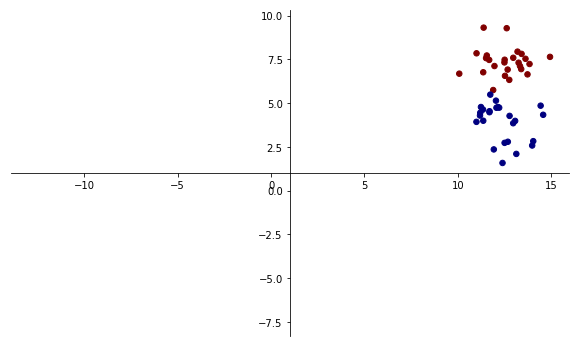

In [3]:
import numpy as np
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(X[:,0],X[:,1], c=y, cmap='jet',s=30)
max_x = np.abs(X[:,0]).max()
max_y = np.abs(X[:,1]).max()
ax.set_xlim(-max_x + 1, max_x +1)
ax.set_ylim(-max_y + 1, max_y +1)
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')

(array([1., 2., 8., 8., 7., 9., 7., 3., 3., 2.]),
 array([10.07391193, 10.55954787, 11.04518381, 11.53081976, 12.0164557 ,
        12.50209164, 12.98772759, 13.47336353, 13.95899947, 14.44463542,
        14.93027136]),
 <a list of 10 Patch objects>)

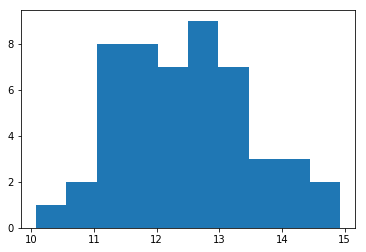

In [4]:
# todo: check the distribution of the data using histogram
plt.hist(X[:,0])

Let's look at 4 different ways data can be transformed to yield more standard ranges.

* `StandardScaler` ensure that for each feature the mean is 0 and variance is 1, bringing all features to the same magnitude. However, this scaling does not ensure any particular minimum and maximum values for the features
* `RobustScaler` works similar to `StandardScaler` in normalizing the statistical properties for each feature, but uses the median and quartiles instead of the mean and variance. So, it ignores data points that are very different from the rest. These "odd" data points are also called outliers, and they can lead to trouble in other scaling methods.
* `MinMaxScaler` shifts the data such that all features are exactly between 0 and 1. For 2-D data, this means all data is contained within the rectangle created by the x-axis between 0 and 1, and y-axis between 0 and 1.
* `Normalizer` rescales each data point such that the feature vector has a Euclidean length of 1 (L2-normal). In other words, it projects a data point on the circle (or sphere, for higher dimensions) with a radius of 1. Every data point is scaled by a different number. This normalization is often used when only the direction of the data matters, not the length of the feature vector.

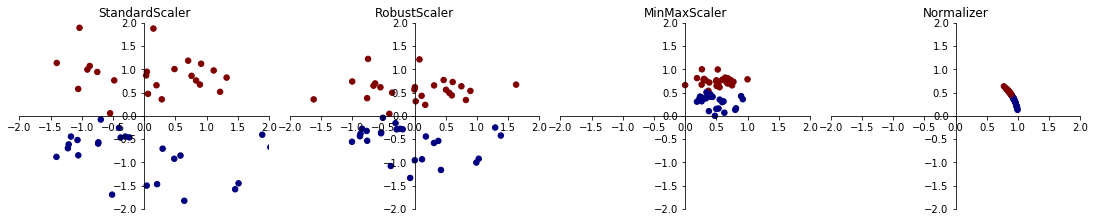

In [5]:
#todo: Set the different scalers as a list and plot it using grids:
scalers=[StandardScaler(),RobustScaler(),MinMaxScaler(),Normalizer(norm='l2')]
fig, other_axes =plt.subplots(1,4,figsize=(15,3))
for ax, scaler in zip(other_axes, scalers):
    X_scaled=scaler.fit_transform(X)
    ax.scatter(X_scaled[:,0],X_scaled[:,1], c=y, cmap='jet',s=30)
    #max_x = np.abs(X[:,0]).max()
    #max_y = np.abs(X[:,1]).max()
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.set_title(type(scaler).__name__)

plt.tight_layout(pad=0.4,w_pad=1.0,h_pad=1.0)
plt.show()


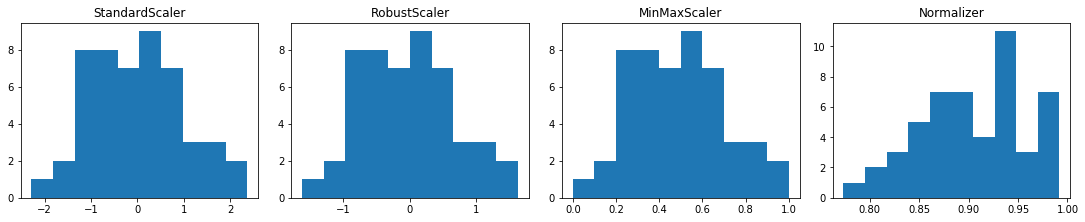

In [6]:
# todo: check the distribution of the data using histogram when it is scaled
fig, other_axes =plt.subplots(1,4,figsize=(15,3))
for ax, scaler in zip(other_axes, scalers):
    X_scaled=scaler.fit_transform(X)
    ax.hist(X_scaled[:,0])
    ax.set_title(type(scaler).__name__)

plt.tight_layout(pad=0.4,w_pad=1.0,h_pad=1.0)
plt.show()

## Dimensionality Reduction

As we discussed earlier, transforming data using unsupervised learning can have many motivations. The most common motivations are *visualization*, *compressing* the data, and *finding a representation* that is more informative for further processing. One of the simplest and most widely used algorithms for all of these is **principal component analysis**. We'll also look at a few other algorithms later on.

### PCA

Principal component analysis, also commonly known as **PCA**, is a method that rotates the features of the dataset in a way such that the rotated features are statistically uncorrelated. This rotation is often followed by selecting only a subset of the new features, according to how important they are for explaining the data. In other words, it "compresses" the data into a representation that contains only the most significant features. As such, this method is most useful in problems that contain a large number of features. Let's see a simple example:

In [7]:
#Todo: Import PCA from sklearn
from sklearn.decomposition import PCA
#Todo: create a random blob with size 300 x 2 and let PCA do it's job
rnd = np.random.RandomState(5)
X = rnd.normal(size=(300,2))
X_blob = np.dot(X, rnd.normal(size=(2,2))) +rnd.normal(size=2)
#Todo: fit the PCA to this blob
pca = PCA()
pca.fit_transform(X_blob)
X_pca = pca.transform(X_blob)

In [8]:
#Todo: check PCA components and other fitted data
pca.__dict__
#Todo: print standard deviations and principle components
S =X_pca.std(axis=0)
print ('Standard Deviations: {}'.format(X_pca.std(axis=0)))
print ('Principal Components: {}'.format(pca.components_))
print ('Mean: {}'.format(pca.mean_))
#Todo: check the mean of PCA

Standard Deviations: [2.53854851 0.38087708]
Principal Components: [[ 0.74827666 -0.6633868 ]
 [ 0.6633868   0.74827666]]
Mean: [-2.03864281 -1.05487343]


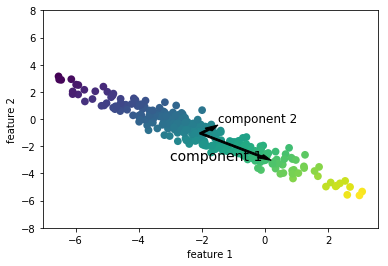

In [9]:
#Todo: Plot the scatter plots and show the pca components on the plotted axes
plt.scatter(X_blob[:,0],X_blob[:,1],c=X_pca[:,0],
            linewidths =0,s=60,cmap='viridis')
plt.arrow(pca.mean_[0],pca.mean_[1],S[0]*pca.components_[0,0],
         S[0]*pca.components_[0,1],width=0.1,head_width=0.3,
         color='k')
plt.arrow(pca.mean_[0],pca.mean_[1],S[1]*pca.components_[1,0],
         S[1]*pca.components_[1,1],width=0.1,head_width=0.3,
         color='k')
plt.text(-1.5,-0.25, 'component 2', size=12)
plt.text(-3,-3, 'component 1', size=14)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.ylim(-8,8)
plt.show()

This plot shows the original data points, colored (with their transformed values) to distinguish among them. The algorithm proceeds by first finding the direction of maximum variance, labeled "Component 1". This is the direction (or vector) in the data that contains most of the information, or in other words, the direction in which the feature are most correlated with each other. Then, the algorithm finds the direction that contains the most information while being orthogonal (at a right angle) to the first direction. In 2-D, there is clearly only one possible orientation that is at a right angle, but in higher N-D spaces there would be (infinitely) many orthogonal directions. The directions drawn by the two arrows are the main direction of variance in the data. In general, there are as many principal components as original features.

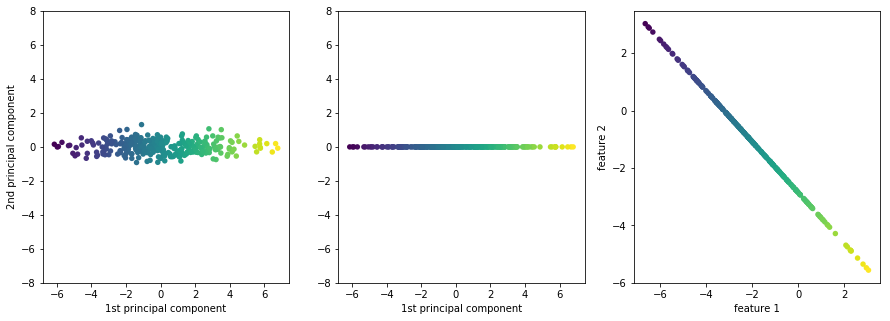

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=X_pca[:, 0], linewidths=0, s=30, cmap='viridis')
axes[0].set_xlabel("1st principal component")
axes[0].set_ylabel("2nd principal component")
axes[0].set_ylim(-8, 8)

#Todo: continue coding with fitting pca on X_blob data with 1 principle component 


#Todo: Plot the original data in single dimension and transformed data

pca =PCA (n_components=1)
pca.fit(X_blob)
X_inverse = pca.inverse_transform(pca.transform(X_blob))

axes[1].scatter(X_pca[:,0],np.zeros(X_pca.shape[0]), c=X_pca[:,0],
                                   linewidths=0, s=30, cmap='viridis')
axes[1].set_ylim(-8,8)
axes[1].set_xlabel('1st principal component')

axes[2].scatter(X_inverse[:,0],X_inverse[:,1],c=X_pca[:,0],
               linewidths=0, s=30, cmap='viridis')
axes[1].set_ylim(-8,8)
axes[2].set_xlabel('feature 1')
axes[2].set_ylabel('feature 2')
plt.show()

The first plot shows the PCA-transformed data. 

We can use PCA for dimensionality reduction by retaining only some of the principal components. In this example, we might keep only the first principal component, as it is also the component with the most variance. This reduces the data from a two-dimensional dataset to a one-dimensional dataset. In the second plot, we used PCA to only retain the first principal component. In the third plot, we transform back to the original feature space after it has been reduced to only its first principal component. 

**Q**: If you are planning to use PCA to preprocess your data before some classification or regression task, should you use the features in reduced form after PCA (2nd plot), or the features that are inversely transformed back to the original feature space after PCA (3rd form)?   

### Visualizing high-dimensional data

One of the most common applications of PCA is visualizing high-dimensional datasets. As we have seen earlier, it is difficult to create scatter plots of data that has more than 2 features. So, what we resorted to was to create a pair plot that gave us a partial picture of the data by showing us all the possible combinations of two features. Even for the breast cancer data, using a pair plot is tricky. The dataset has 30 features, which would result in 30 \* 14 = 420 scatter plots! We would never be able to look at these plots in detail, let alone try understanding and analyzing them.

One way to visualize the separation between the classes is by computing histograms of each of the features for the two classes -- benign and malignant cancer. This is a simple way to see which features are likely to be able to separate the two classes well. 

In [11]:
#Todo: Assign load_breast_cancer dataset from sklearn to cancer
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#Todo: analyze the cancer dataset.. You can use either sklearn's documentation or use this notebook to check
#Todo: check the target classes
cancer.data
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

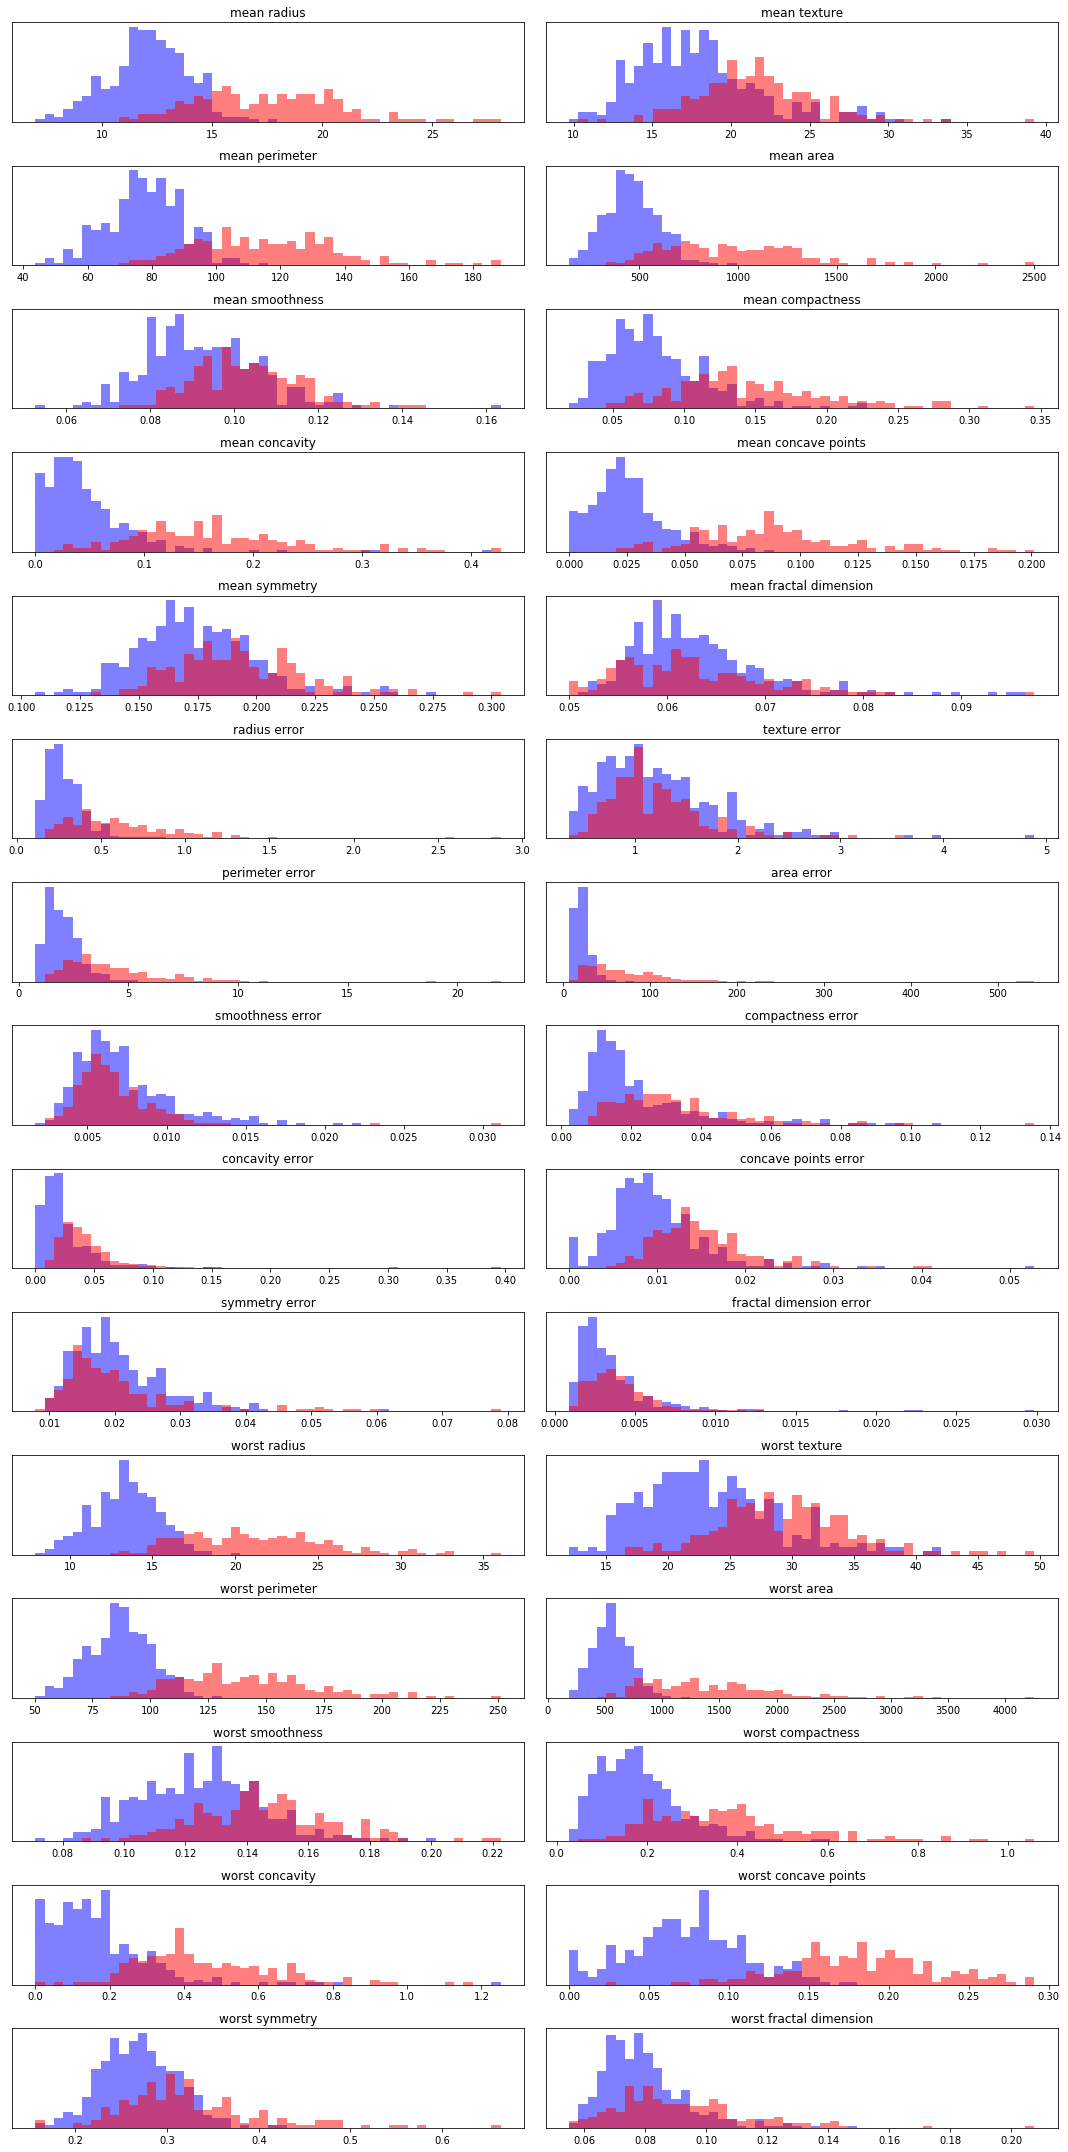

In [12]:
#Todo: plot histograms of this cancer dataset
fig, other_axes = plt.subplots(15,2,figsize=(15,30))
malignant = cancer.data[cancer.target ==1] 
benign = cancer.data[cancer.target ==0]
ax = other_axes.ravel()
for i in range(30):
    _,bins=np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins, color='blue',alpha=0.5)
    ax[i].hist(benign[:,i],bins=bins, color='red',alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
plt.tight_layout()
plt.show()

Here we create a histogram for each of the features. What's a *histogram*? It counts how often a data point appears with a feature in a certain range (called a *bin*). Each plot overlays two histograms, one for all the points in the benign class (green) and one for all the points in the malignant class (blue). This gives us some idea of how each feature is distributed across the two classes and allows us to make a guess as to which features are better at distinguishing malignant and benign samples. For example, "smoothness error" seems quite uninformative while the feature "worst concave points" seems quite useful because we can tell apart the two classes with little overlap between them.

By using PCA, we can capture the main interactions between these variables and get a more complete picture. We can find the first two principal components (at least visually possible) and visualize the data in this new two-dimensional space with a single scatter plot. Before we apply PCA, let's also scale our data with `StandardScaler` so that each feature has unit variance:

In [13]:
#Todo: use standard scaler to scale the cancer data
scaler = StandardScaler()
X_scaled =scaler.fit_transform(cancer.data)

Learning the PCA transformation and applying it is as simple as applying a preprocessing transformation. We instantiate the `PCA` object, find the principal components by calling the `fit()` method, and then apply the rotation and dimensionality reduction by calling `transform()`. (You can call both together thru `fit_transform()`.) 

As usual PCA rotates (and shifts) the data, but keeps all principal components. To reduce the dimensionality of the data, we need to specify how many components we want to keep when creating the PCA object:

In [14]:
#Todo: keep the first two principal components of the data
pca = PCA(n_components=2)
#Todo: fit PCA model to scaled breast cancer data
pca.fit(X_scaled)
#Todo: transform data onto the first two principal components and print the orignal and reduced shape
X_pca = pca.transform(X_scaled)
print ('Original shape:{}'.format(str(X_scaled.shape)))
print ('PCA Transformed shape:{}'.format(str(X_pca.shape)))

Original shape:(569, 30)
PCA Transformed shape:(569, 2)


You can now plot the first two principal components:

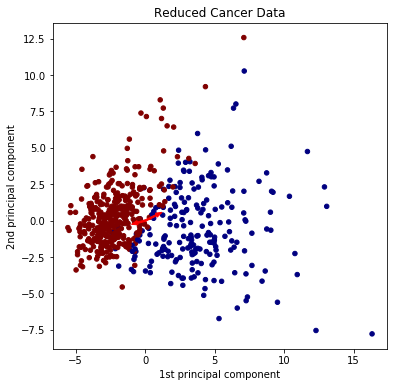

In [15]:
#Todo: plot first vs. second principal component, colored by class
#Todo: show the arrows as you did previously
pca.components_
S = X_pca.std(axis=0)
plt.figure(figsize=(6,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=cancer.target,cmap='jet',s=20)
plt.arrow(pca.mean_[0],pca.mean_[1],S[0]*pca.components_[0,0],
         S[0]*pca.components_[0,1],width=0.1,head_width=0.3,
         color='red')
plt.arrow(pca.mean_[0],pca.mean_[1],S[1]*pca.components_[1,0],
         S[1]*pca.components_[1,1],width=0.1,head_width=0.3,
         color='red')
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.title('Reduced Cancer Data')
plt.show()

It is important to note that PCA is an unsupervised method, and does not use any class information when finding the rotation. It simply looks at the correlations in the data. For the scatter plot shown here, we plotted the first principal component against the second principal component, and then used the class information to color the points (class information was never used to learn this distribution). You can see that the two classes separate quite well in this 2-D space. This leads us to believe that even a linear classifier (that would learn a line in this space) could do a reasonably good job at distinguishing the two classes. We can also see that the malignant (purple) points are more spread out than the benign (yellow) points, something that we could already see a bit from the histograms earlier.

A downside of PCA is that the two axes in the plot are often not very easy to interpret. The principal components correspond to directions in the original data, so they are *combinations of the original features*. However, these combinations are usually very complex.

### Dissecting PCA

Let's take a look at what makes this PCA work.

In [16]:
#Todo: print PCA component shape
print('PCA component shape: {}'.format(str(pca.components_.shape)))

PCA component shape: (2, 30)


Each row in `components_` corresponds to one principal component, and they are sorted by their importance (the first principal component comes first, and etc.). The columns correspond to the original features attribute of the PCA in this example, "mean
radius", "mean texture", and so on. Recall, there were 30 of them. Let's have a look at the content of `components_`:

In [17]:
#Todo: print PCA components
print("PCA components: {}".format(str(pca.components_)))

PCA components: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


We can also visualize the coefficients using a heatmap, which might be easier to understand:

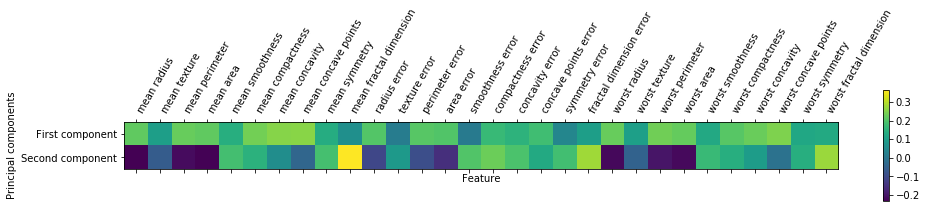

In [18]:
#Todo: Run this line of code to check the heat map
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")
plt.show()

You can see that in the first component, all features have the same sign (all positive, but it actually doesn't matter which direction). That means that there is a general correlation between all features. As one measurement is high, the others are likely to be high as well. The second component has mixed signs, and both of the components involve all of the 30 features. This mixing of features is what makes explaining the earlier axes tricky.

## Homework: Revisit the Leaf dataset

What we are going to do now is to work hand-in-hand with the [Leaf dataset](https://www.kaggle.com/c/leaf-classification/data) (get both the training and test data), implementing some of the things we have done before. Do it outside Jupyter notebook in a separate .py file (you can use Spyder or plain ol' text editor with command line interface)

* Read both training and test CSVs
* Parse the CSVs into their respective data (`X`) and labels (`y`)
* Select your classifier (SVM, Logistic Regression, etc.)
* Perform cross validation to get your classification performance (both training and test scores)

Test out if pre-processing can boost your performance. **Note: Ensure that your test data is also pre-processed in the same way!** 

Now that we’ve seen how simple data transformations for preprocessing work, let's move on to more interesting transformations using unsupervised learning.



1. Try to perform PCA on the leaf attributes data and see if you are able to improve your previous best scores.
2. Get the leaf image data (`images.zip` from [here](https://www.kaggle.com/c/leaf-classification/data)) and try replicate what you just did for the LFW dataset.